In [1]:
# conda: gridTools xesmfTools

# cd to the 'lib' directory in your notebooks directory
# $ export LIBROOT=`pwd`
# Start jupyter lab from any directory
import sys, os
if (os.environ.get('LIBROOT')):
    sys.path.append(os.environ.get('LIBROOT'))

    from sysinfo import SysInfo
info = SysInfo()
info.show(vList=['platform','python','esmf','esmpy','xgcm','xesmf',
                 'netcdf4','numpy','xarray',
                 'cartopy','matplotlib',
                 'jupyter_core','jupyterlab','notebook',
                 'dask'])
    
from gridutils import GridUtils

# REF: https://www.kite.com/python/answers/how-to-hide-a-figure-from-being-shown-in-matplotlib-in-python
# Call figure.show on a cell to show the figure - this should help panel and geoview applications
import matplotlib.pyplot as plt
%matplotlib inline

System name                             : Linux
System name                             : mom6vm
Operating system release                : 5.8.0-48-generic
Operating system version                : #54~20.04.1-Ubuntu SMP Sat Mar 20 13:40:25 UTC 2021
Hardware identifier                     : x86_64
Active conda environment                : xesmfTools
Conda reported versions of software:
platform                                : linux-64
python                                  : 3.7.10
esmf                                    : 8.0.1
esmpy                                   : 8.0.1
xgcm                                    : not installed
xesmf                                   : 0.5.2
netcdf4                                 : 1.5.6
numpy                                   : 1.20.1
xarray                                  : 0.17.0
cartopy                                 : 0.18.0
matplotlib                              : 3.3.4
jupyter_core                            : 4.7.1
jupyterlab          

In [2]:
grd = GridUtils()
grd.verboseLevel = 1
grd.debugLevel = 1

In [3]:
# Help (module)
help(GridUtils)

Help on class GridUtils in module gridutils:

class GridUtils(builtins.object)
 |  GridUtils(app={})
 |  
 |  Methods defined here:
 |  
 |  __init__(self, app={})
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  application(self, app={})
 |      Attach application items to the GridUtil object.
 |      
 |      app = {
 |          'messages': panel.widget.TextBox     # Generally a pointer to a panel widget for display of text
 |          'defaultFigureSize': (8,6)           # Default figure size to return from matplotlib
 |          'usePaneMatplotlib': True/False      # Instructs GridUtils to use panel.pane.Matplotlib for plot objects 
 |      }
 |  
 |  cart2pol(self, x, y, z)
 |      Transform a point on globe from Cartesian (x,y,z) to polar coordinates.
 |  
 |  clearGrid(self)
 |      Call this when you want to erase the current grid and grid parameters.  This also
 |      clobbers any current plot parameters.
 |      Do not call this method between 

In [4]:
# Demonstrate a plotting error when a projection information is not set
grd.clearGrid()
(figure, axes) = grd.plotGrid()

Help on method plotGrid in module gridutils:

plotGrid() method of gridutils.GridUtils instance
    Perform a plot operation.
    
    :return: Returns a tuple of matplotlib objects (figure, axes)
    :rtype: tuple
    
    To plot a grid, you first must have the projection set.
    
    :Example:
    
    >>> grd = gridUtils()
    >>> grd.setPlotParameters(
            {
                ...other grid options...,
                'projection': {
                    'name': 'Mercator',
                    ...other projection options...,
                },
    >>> grd.plotGrid()



/home/cermak/gridtools/gridTools/lib/gridutils.py:562: UserWarning: Please set the plot 'projection' parameter 'name'
  warnings.warn("Please set the plot 'projection' parameter 'name'")


In [5]:
# Make sure we erase any previous grid, grid parameters and plot parameters.
grd.clearGrid()

# Specify the grid parameters
# gridMode should be 2.0 for supergrid
grd.setGridParameters({
    'projection': {
        'name': 'LambertConformalConic',
        'lon_0': 230.0,
        'lat_0': 40.0
    },
    'dx': 20.0,
    'dxUnits': 'degrees',
    'dy': 30.0,
    'dyUnits': 'degrees',
    'tilt': 30,
    'gridResolution': 1.0,
    'gridMode': 2.0
})

# To set or update dictionary items in 'projection', you can use the dictionary format above with a direct assigment
# or use the subKey parameter as in below.  
#grd.setGridParameters({
#    'name': 'LambertConformalConic',
#    'lon_0': 230.0,
#    'lat_0': 40.0
#}, subKey='projection')

In [6]:
# This forms a grid in memory using the specified grid parameters
grd.makeGrid()

Generating regular lat-lon grid centered at 230.00 0.00 on equator.
   Generated regular lat-lon grid between latitudes -15.00 15.00
   Number of js=61


In [7]:
grd.saveGrid(filename="nikiTest.nc")

Successfully wrote netCDF file to nikiTest.nc


In [8]:
grd.showGridParameters()

Current grid parameters:
          projection: {'name': 'LambertConformalConic', 'lon_0': 230.0, 'lat_0': 40.0, 'lat_1': 25.0, 'lat_2': 55.0}
                  dx: 20.0
             dxUnits: degrees
                  dy: 30.0
             dyUnits: degrees
                tilt: 30
      gridResolution: 1.0
            gridMode: 2.0


In [9]:
grd.grid

<xarray.Dataset>
Dimensions:   (nx: 40, nxp: 41, ny: 60, nyp: 61)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 229.0 229.5 229.9 230.4 ... 230.2 230.9 231.7
    y         (nyp, nxp) float64 22.06 22.31 22.56 22.81 ... 57.44 57.69 57.93
    dx        (nyp, nx) float64 5.369e+04 5.369e+04 ... 5.369e+04 5.369e+04
    dy        (ny, nxp) float64 5.559e+04 5.559e+04 ... 5.559e+04 5.559e+04
    angle_dx  (nyp, nxp) float64 0.5526 0.5504 0.5451 ... 0.5422 0.5331 0.53
    area      (ny, nx) float64 2.988e+09 2.988e+09 ... 2.988e+09 2.988e+09
Attributes:
    grid_version:  0.2
    code_version:  GridTools: beta
    history:       sometime: GridTools

In [10]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NearsidePerspective',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Nearside Perspective: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

# Projection may be specified separately
grd.setPlotParameters(
    {
        'name': 'NearsidePerspective',
        'lat_0': 40.0,
        'lon_0': 230.0        
    }, subKey='projection'
)

In [11]:
(figure, axes) = grd.plotGrid()

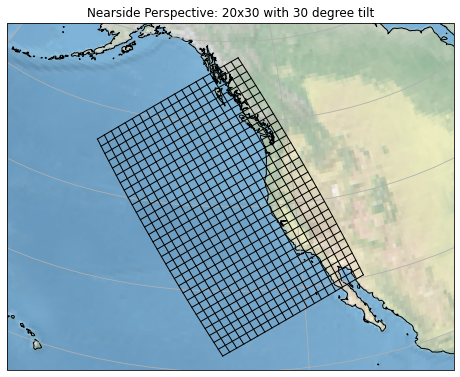

In [12]:
figure

In [13]:
# Plot last grid also on a Mercator projection
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': 40.0,
            'lon_0': 230.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': "Mercator projection: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

In [14]:
(figure, axes) = grd.plotGrid()

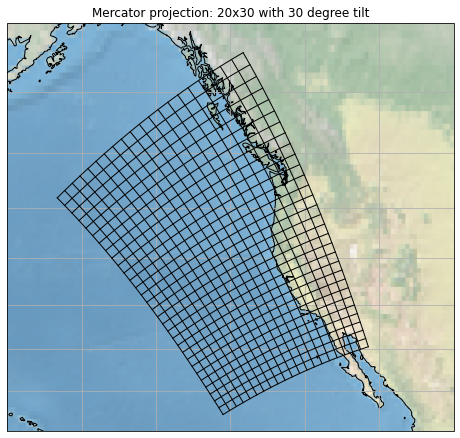

In [15]:
figure

In [16]:
# Show in Lambert Conformal Conic
# It appears that the standard parallels are computed on the fly.
# (latGridCenter - (latSpan/2), latGridCenter + (latSpan/2))
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': { 
            'name': 'LambertConformalConic',
            'lon_0': 230.0,
            'lat_1': 25.0,
            'lat_2': 55.0
        },
        'extent': [-160.0 ,-100.0, 20.0, 60.0],
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGridCells': True,
        'title': 'Lambert Conformal Conic: 20x30 with 30 degree tilt',
        'iColor': 'r',
        'jColor': 'b'
    }
)

In [17]:
(figure, axes) = grd.plotGrid()

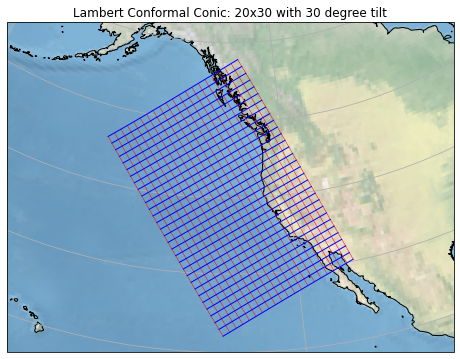

In [18]:
figure

In [19]:
# Arctic Grid #6
# Demonstration of a North Polar Stereo projection grid
# Central longitude of 160.0
# True scale latitude is currently unknown
arctic6 = '/home/cermak/gridtools/gridTools/configs/Arctic6/ocean_hgrid.nc'
grd.clearGrid()
grd.openDataset(arctic6)
grd.readGrid()
grd.closeDataset()

In [20]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'NorthPolarStereo',    
            'lon_0': 160.0
        },
        'extent': [-180, 180, 38, 90],
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': 'North Polar Stereo: Arctic6',
        'iColor': 'r',
        'jColor': 'b'
    }
)

In [21]:
# In the next to calls to plotGrid() we store the plots to variables
# that are shown later.
(figureArctic, axes) = grd.plotGrid()

In [22]:
# NEP7: North East Pacific Grid #7
# Demonstration of Lambert Conformal Conic projection
nep7 = '/home/cermak/gridtools/gridTools/configs/NEP7/ocean_hgrid.nc'
grd.clearGrid()
grd.openDataset(nep7)
grd.readGrid()
grd.closeDataset()

In [23]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'LambertConformalConic',
            'lon_0': -91.0,
            'lat_1': 40.0,
            'lat_2': 60.0
        },
        'extent': [-180, 180, 10.5, 90],
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': 'Lambert Conformal Conic: NEP7',
        'iColor': 'r',
        'jColor': 'b'
    }
)

In [24]:
(figureNEP, axes) = grd.plotGrid()

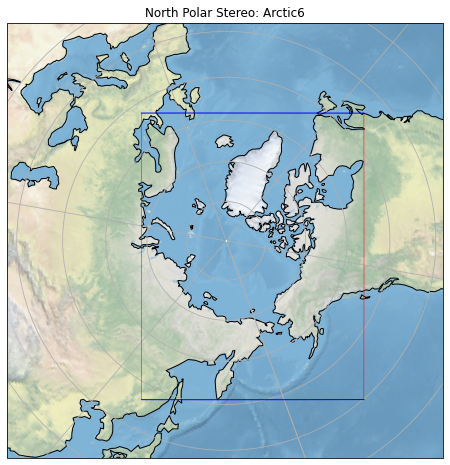

In [25]:
# Show the above figures here instead.
# Only one figure per cell is supported.  Each figure is shown in separate cells.
figureArctic

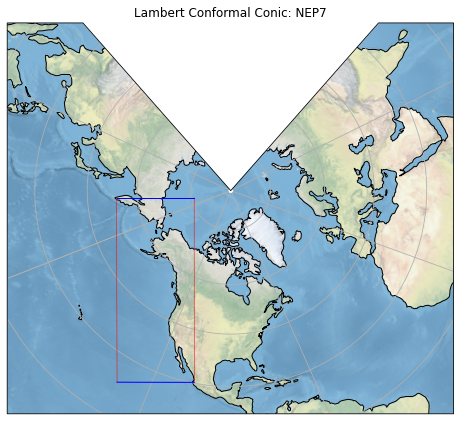

In [26]:
figureNEP